### IMPORT MODULES & LOAD DATA


In [1]:
#Importing Libraries 

import os 
import numpy 
import pandas as pd
import seaborn as sns 

In [2]:
#Set working directory

os.getcwd()
os.chdir("/Users/sheeba/Desktop/data_science /python/Project8-PropertyPricePrediction/Dataset")


In [3]:
#Reading the data 

predictionDf=pd.read_csv("Property_Price_Prediction.csv") # This is the prediction data

sourceDf=pd.read_csv("Property_Price_Train.csv") # Contains the Train Data + Test Data


In [4]:
#To see the print output properly

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 500)

In [5]:
#Splitting the RawDf data into train and test with 80-20 ratio (80% training and 20% testing)
from sklearn.model_selection import train_test_split
trainDf, testDf= train_test_split(sourceDf, random_state=7, shuffle=True)

### Data Preprocessing 

Splitting the 'RawDf data' into train and test with 80-20 ratio. Here, 80% is the training data used to train the model and another 20% is the testing data

In [6]:
from sklearn.model_selection import train_test_split
trainDf, testDf= train_test_split(sourceDf, random_state=7, shuffle=True)

In [7]:
# For easy identification, we categorise the data

trainDf['Source']="Train"
testDf['Source']="Test"
predictionDf['Source']="Prediction"

<ipython-input-7-376a966c6f2a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainDf['Source']="Train"
<ipython-input-7-376a966c6f2a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testDf['Source']="Test"


In [8]:
# Combining the test+train+prediction data for easier identification & easy pre-processing
sourceDf=pd.concat([trainDf,testDf,predictionDf], axis=0)
sourceDf.shape

(2918, 82)

In [9]:
#Dropping 'ID' column that is useless for our analysis
sourceDf=sourceDf.drop(['Id'], axis=1)

Univariate Analysis = 
Null Values and Missing Value Imputation 

In [10]:
sourceDf.dtypes #checking the data type for missing value treatment

Building_Class                 int64
Zoning_Class                  object
Lot_Extent                   float64
Lot_Size                     float64
Road_Type                     object
Lane_Type                     object
Property_Shape                object
Land_Outline                  object
Utility_Type                  object
Lot_Configuration             object
Property_Slope                object
Neighborhood                  object
Condition1                    object
Condition2                    object
House_Type                    object
House_Design                  object
Overall_Material               int64
House_Condition                int64
Construction_Year              int64
Remodel_Year                   int64
Roof_Design                   object
Roof_Quality                  object
Exterior1st                   object
Exterior2nd                   object
Brick_Veneer_Type             object
Brick_Veneer_Area            float64
Exterior_Material             object
E

In [11]:
#loop method for missing value imputation [univariate analysis] 
sourceDf.isnull().sum()  

Building_Class                  0
Zoning_Class                    4
Lot_Extent                    486
Lot_Size                        0
Road_Type                       0
Lane_Type                    2720
Property_Shape                  0
Land_Outline                    0
Utility_Type                    2
Lot_Configuration               0
Property_Slope                  0
Neighborhood                    0
Condition1                      0
Condition2                      0
House_Type                      0
House_Design                    0
Overall_Material                0
House_Condition                 0
Construction_Year               0
Remodel_Year                    0
Roof_Design                     0
Roof_Quality                    0
Exterior1st                     1
Exterior2nd                     1
Brick_Veneer_Type              24
Brick_Veneer_Area              23
Exterior_Material               0
Exterior_Condition              0
Foundation_Type                 0
Basement_Heigh

In [12]:
# Loop method for missing value imputation 
sourceDf.isnull().sum()     

sourceDf_columns=sourceDf.columns
print(sourceDf_columns)
for i in (sourceDf_columns):
    
    if (i in ["Sale_Price", "Source"]):
        continue
    
    if trainDf[i].dtype == object:
        print("Cat: ", i)
        tempMode = sourceDf.loc[sourceDf["Source"] == "Train", i].mode()[0]
        sourceDf[i].fillna(tempMode, inplace = True)
    else:
        print("Cont: ", i)
        tempMedian = trainDf[i].median()
        sourceDf[i] = sourceDf[i].fillna(tempMedian)

Index(['Building_Class', 'Zoning_Class', 'Lot_Extent', 'Lot_Size', 'Road_Type', 'Lane_Type', 'Property_Shape', 'Land_Outline', 'Utility_Type', 'Lot_Configuration', 'Property_Slope', 'Neighborhood', 'Condition1', 'Condition2', 'House_Type', 'House_Design', 'Overall_Material', 'House_Condition', 'Construction_Year', 'Remodel_Year', 'Roof_Design', 'Roof_Quality', 'Exterior1st', 'Exterior2nd', 'Brick_Veneer_Type', 'Brick_Veneer_Area', 'Exterior_Material', 'Exterior_Condition', 'Foundation_Type',
       'Basement_Height', 'Basement_Condition', 'Exposure_Level', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'Total_Basement_Area', 'Heating_Type', 'Heating_Quality', 'Air_Conditioning', 'Electrical_System', 'First_Floor_Area', 'Second_Floor_Area', 'LowQualFinSF', 'Grade_Living_Area', 'Underground_Full_Bathroom', 'Underground_Half_Bathroom', 'Full_Bathroom_Above_Grade', 'Half_Bathroom_Above_Grade', 'Bedroom_Above_Grade', 'Kitchen_Above_Grade', 'Kitchen_Quality',
      

In [13]:
sourceDf.isnull().sum()  #for checking 

Building_Class                  0
Zoning_Class                    0
Lot_Extent                      0
Lot_Size                        0
Road_Type                       0
Lane_Type                       0
Property_Shape                  0
Land_Outline                    0
Utility_Type                    0
Lot_Configuration               0
Property_Slope                  0
Neighborhood                    0
Condition1                      0
Condition2                      0
House_Type                      0
House_Design                    0
Overall_Material                0
House_Condition                 0
Construction_Year               0
Remodel_Year                    0
Roof_Design                     0
Roof_Quality                    0
Exterior1st                     0
Exterior2nd                     0
Brick_Veneer_Type               0
Brick_Veneer_Area               0
Exterior_Material               0
Exterior_Condition              0
Foundation_Type                 0
Basement_Heigh

Bivariate analysis for continusous variables = Scatterplot

In [14]:
corrDf=sourceDf[sourceDf["Source"]=="Train"].corr() #shows numbers

In [15]:
corrDf.head() 

,Building_Class,Lot_Extent,Lot_Size,Overall_Material,House_Condition,Construction_Year,Remodel_Year,Brick_Veneer_Area,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,Total_Basement_Area,First_Floor_Area,Second_Floor_Area,LowQualFinSF,Grade_Living_Area,Underground_Full_Bathroom,Underground_Half_Bathroom,Full_Bathroom_Above_Grade,Half_Bathroom_Above_Grade,Bedroom_Above_Grade,Kitchen_Above_Grade,Rooms_Above_Grade,Fireplaces,Garage_Built_Year,Garage_Size,Garage_Area,W_Deck_Area,Open_Lobby_Area,Enclosed_Lobby_Area,Three_Season_Lobby_Area,Screen_Lobby_Area,Pool_Area,Miscellaneous_Value,Month_Sold,Year_Sold,Sale_Price
Building_Class,1.000000,-0.375204,-0.151415,0.015161,-0.035973,0.027752,0.051120,0.002755,-0.073192,-0.050067,-0.152653,-0.258716,-0.281221,0.303251,0.046070,0.060282,0.021708,-0.020101,0.125435,0.149208,-0.023698,0.266982,0.031109,-0.059634,0.083416,-0.062429,-0.025106,-0.008221,-0.045115,0.004460,-0.051776,-0.023596,0.009560,0.032598,-0.015512,0.007136,-0.095911
Lot_Extent,-0.375204,1.000000,0.306817,0.233116,-0.050668,0.120995,0.085383,0.162307,0.142675,0.050178,0.123415,0.298256,0.362875,0.066019,0.056650,0.328375,0.079018,-0.002738,0.167212,0.080822,0.236189,-0.018868,0.303066,0.211664,0.053627,0.289793,-0.037035,0.063076,-0.018549,-0.016178,0.080557,0.034496,0.111550,-0.004415,0.028559,-0.003466,0.361367
Lot_Size,-0.151415,0.306817,1.000000,0.088221,-0.006862,0.017351,0.012509,0.088823,0.201497,0.070644,0.004329,0.238081,0.300943,0.034762,0.004506,0.251057,0.156744,0.013689,0.117687,0.033701,0.128479,-0.022732,0.184455,0.268986,-0.027109,0.179479,0.016968,0.019731,-0.026450,0.016032,0.040606,0.037673,0.055606,0.059318,-0.001625,-0.016179,0.250241
Overall_Material,0.015161,0.233116,0.088221,1.000000,-0.062036,0.567331,0.558930,0.404310,0.187164,-0.044146,0.331709,0.531238,0.460448,0.301096,-0.052198,0.592809,0.085659,-0.051198,0.559881,0.270291,0.117905,-0.181552,0.439539,0.395858,0.495025,0.592777,0.029648,0.070115,-0.081231,-0.013245,0.031315,0.051906,0.053054,-0.034537,0.080517,-0.003374,0.792778
House_Condition,-0.035973,-0.050668,-0.006862,-0.062036,1.000000,-0.355308,0.067585,-0.130786,-0.023514,0.027071,-0.135621,-0.159525,-0.135043,0.031009,-0.026553,-0.074687,-0.040920,0.151001,-0.201142,-0.053301,0.026608,-0.082079,-0.045098,-0.015728,-0.304559,-0.160127,-0.012056,0.054183,-0.003101,-0.021282,0.017203,0.026751,0.003813,0.066592,0.005658,0.052853,-0.063978


<AxesSubplot:>

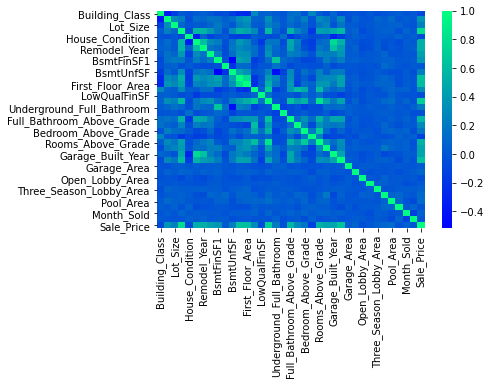

In [16]:
sns.heatmap(corrDf,linecolor="blue", xticklabels="auto", yticklabels="auto", cmap='winter')

Bivariate analysis for categorical variables = Boxplot

In [17]:
categoricalVars=trainDf.columns[trainDf.dtypes==object]
print(categoricalVars)  

Index(['Zoning_Class', 'Road_Type', 'Lane_Type', 'Property_Shape', 'Land_Outline', 'Utility_Type', 'Lot_Configuration', 'Property_Slope', 'Neighborhood', 'Condition1', 'Condition2', 'House_Type', 'House_Design', 'Roof_Design', 'Roof_Quality', 'Exterior1st', 'Exterior2nd', 'Brick_Veneer_Type', 'Exterior_Material', 'Exterior_Condition', 'Foundation_Type', 'Basement_Height', 'Basement_Condition', 'Exposure_Level', 'BsmtFinType1', 'BsmtFinType2', 'Heating_Type', 'Heating_Quality',
       'Air_Conditioning', 'Electrical_System', 'Kitchen_Quality', 'Functional_Rate', 'Fireplace_Quality', 'Garage', 'Garage_Finish_Year', 'Garage_Quality', 'Garage_Condition', 'Pavedd_Drive', 'Pool_Quality', 'Fence_Quality', 'Miscellaneous_Feature', 'Sale_Type', 'Sale_Condition', 'Source'],
      dtype='object')


<ipython-input-18-d62603df7c3b>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  figure()


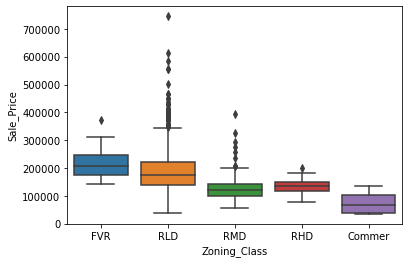

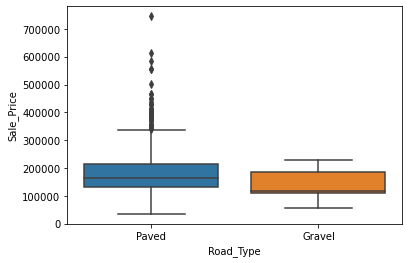

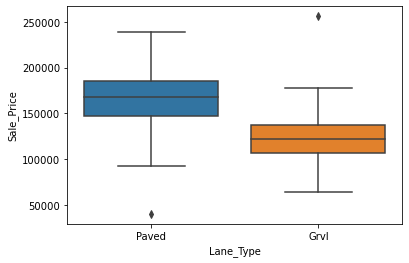

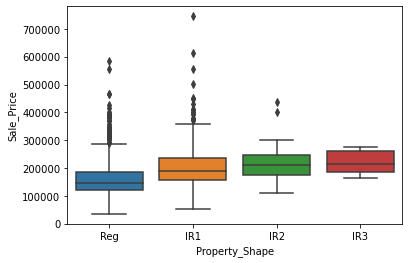

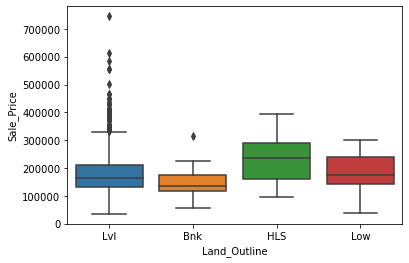

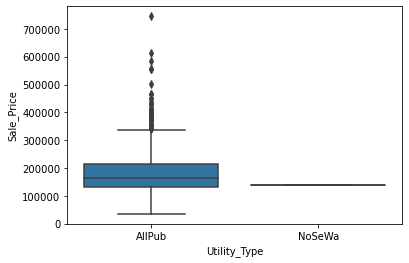

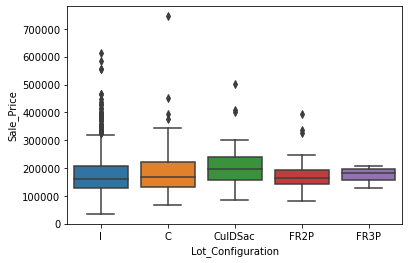

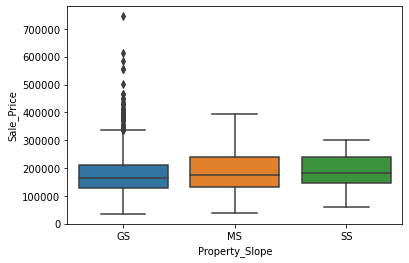

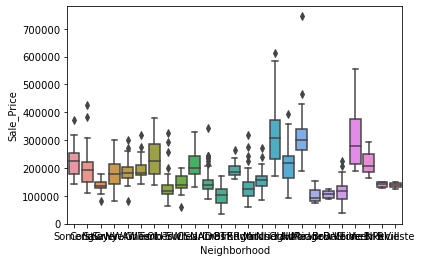

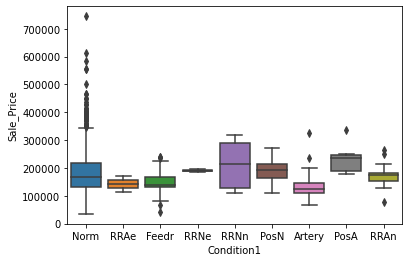

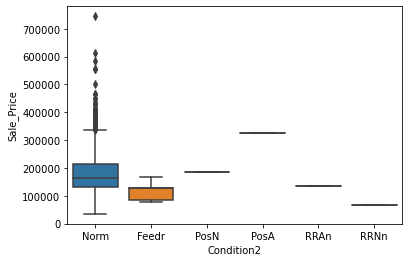

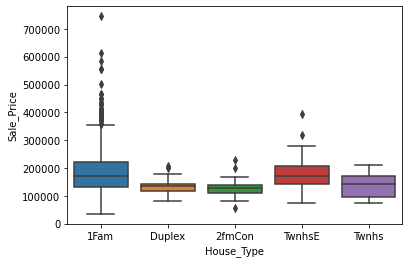

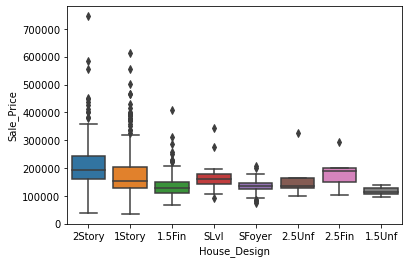

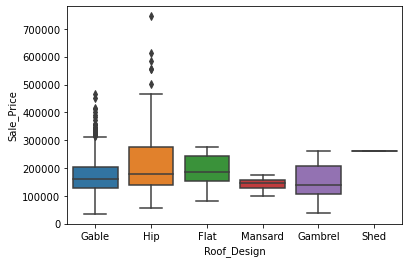

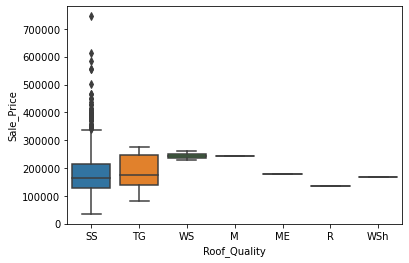

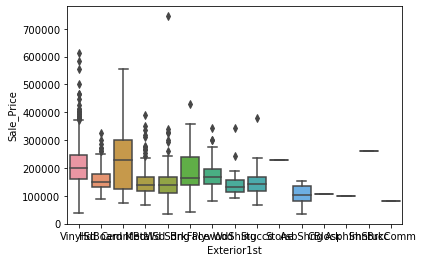

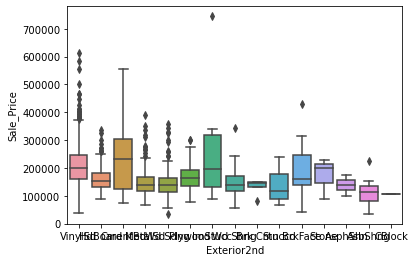

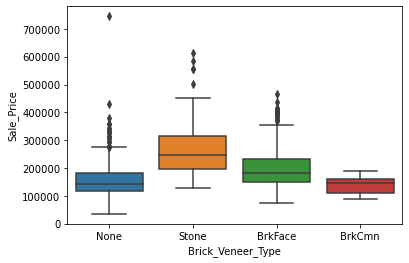

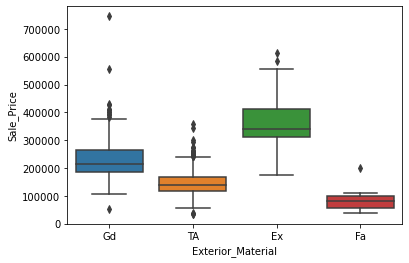

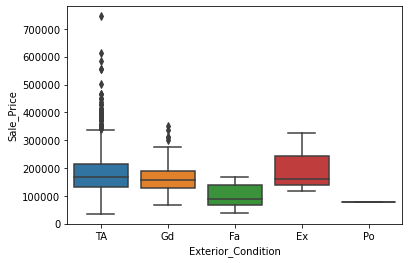

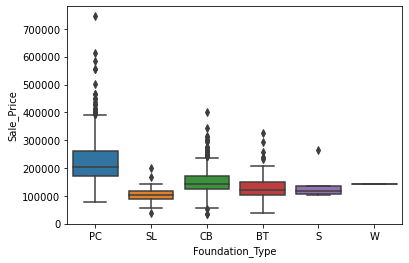

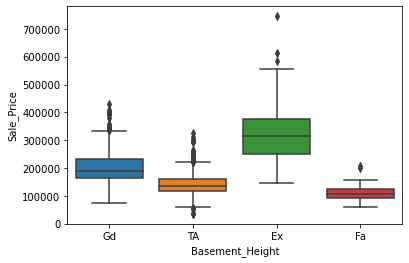

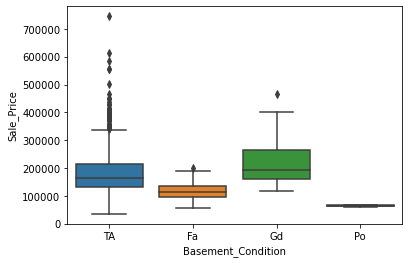

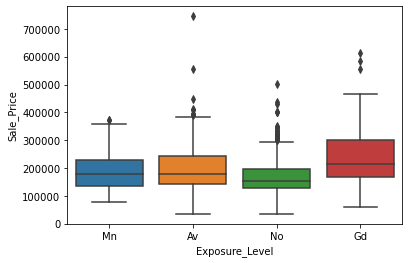

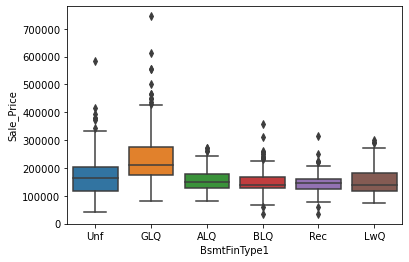

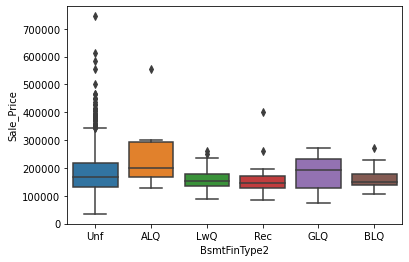

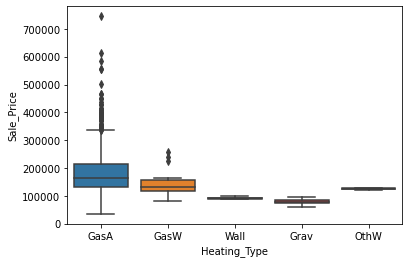

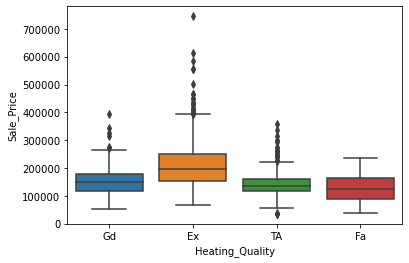

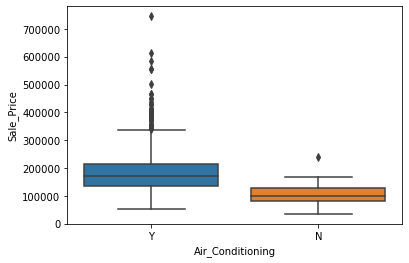

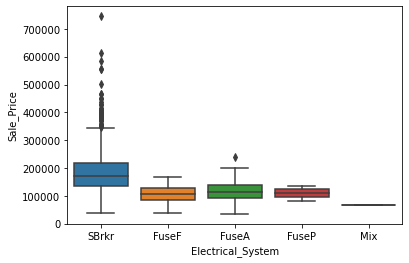

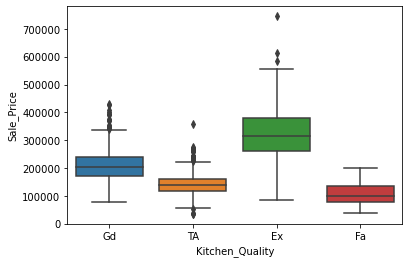

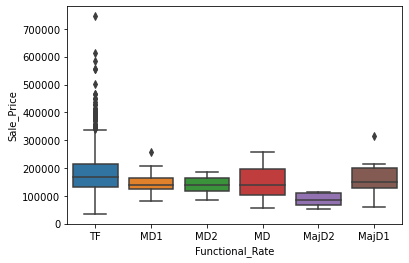

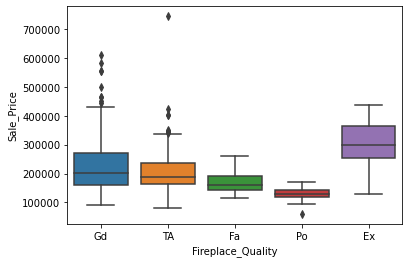

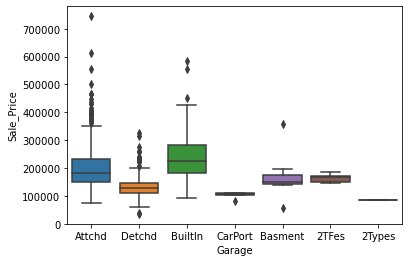

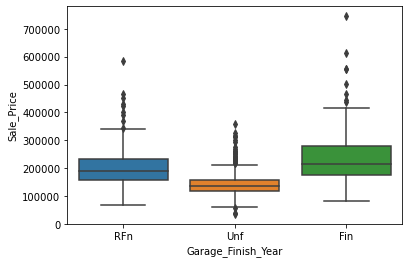

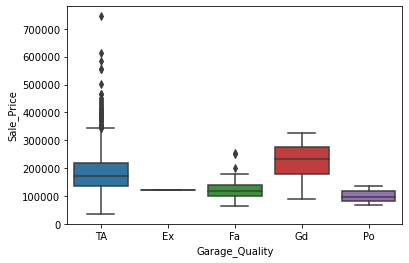

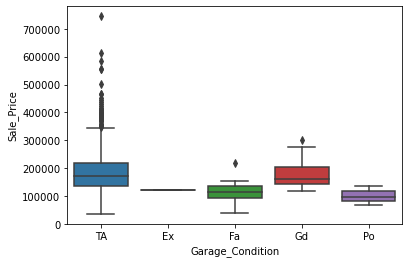

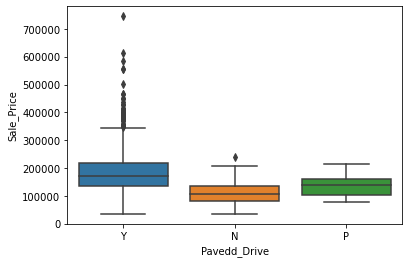

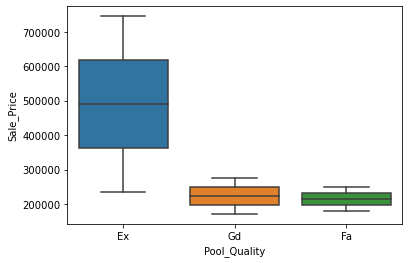

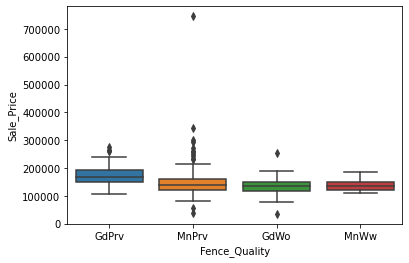

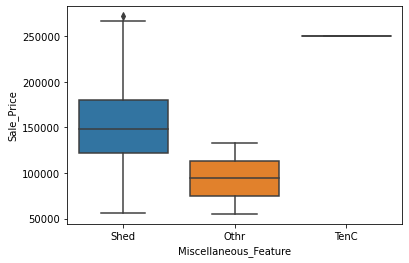

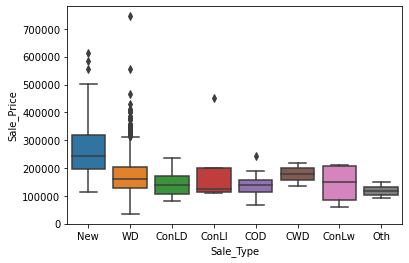

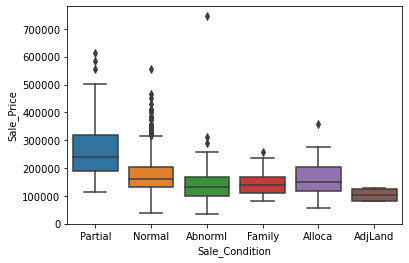

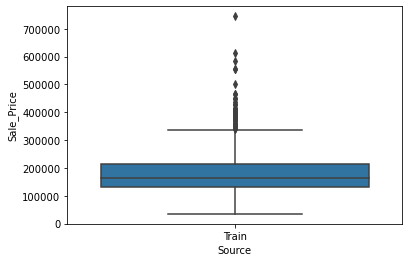

In [18]:
from matplotlib.pyplot import figure
for colName in categoricalVars:
    figure()    
    sns.boxplot(y = trainDf["Sale_Price"], x = trainDf[colName])
     

Dummy Variable Creation

In [19]:
sourceDf2=pd.get_dummies(sourceDf, drop_first=True) #drop_first for avoid perfect heteroscadicity

In [20]:
sourceDf.shape #Before Dummy Variable Coding

(2918, 81)

In [21]:
sourceDf2.shape # Post Dummy Variable Coding

(2918, 257)

In [22]:
# Adding the beta(0) or the intercept
from statsmodels.api import add_constant
sourceDf2=add_constant(sourceDf2)
sourceDf2.shape

(2918, 258)

Sampling

In [23]:

# dividing sourceDf into train, test, and prediction
trainDf=sourceDf2[sourceDf2['Source_Train']==1].drop(['Source_Train', 'Source_Test'], axis=1).copy()
testDf=sourceDf2[sourceDf2['Source_Test']==1].drop(['Source_Train', 'Source_Test'], axis=1).copy()
predictionDf=sourceDf2[(sourceDf2['Source_Test']==0) & (sourceDf2['Source_Train']==0)].drop(['Source_Train', 'Source_Test'], axis=1).copy()

In [24]:
trainDf.shape

(1094, 256)

In [25]:
testDf.shape

(365, 256)

In [26]:
predictionDf.shape

(1459, 256)

In [27]:
#separating the independant variables (X[i])) and dependant variables (Y[i])
trainX=trainDf.drop(['Sale_Price'], axis=1).copy()
trainY=trainDf['Sale_Price'].copy()
testX=testDf.drop(['Sale_Price'], axis=1).copy()
testY=testDf['Sale_Price'].copy()

In [28]:
trainX.shape

(1094, 255)

In [29]:
trainY.shape

(1094,)

In [30]:
testX.shape

(365, 255)

In [31]:
testY.shape

(365,)

VIF check for multicollinearity

In [32]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [33]:
tempMaxVIF = float(5) # The VIF that will be calculated at EVERY iteration in while loop
maxVIFCutoff = float(5) # 5 is recommended cutoff value for linear regression
trainXCopy = trainX.copy()
counter = 1
highVIFColumnNames = []

In [34]:
while (tempMaxVIF >= maxVIFCutoff):
    
    print(counter)
    
    # Create an empty temporary df to store VIF values
    tempVIFDf = pd.DataFrame()
    
    # Calculate VIF using list comprehension
    tempVIFDf['VIF'] = [variance_inflation_factor(trainXCopy.values, i) for i in range(trainXCopy.shape[1])]
    
    # Create a new column "Column_Name" to store the col names against the VIF values from list comprehension
    tempVIFDf['Column_Name'] = trainXCopy.columns
    
    # Drop NA rows from the df - If there is some calculation error resulting in NAs
    tempVIFDf.dropna(inplace=True)
    
    # Sort the df based on VIF values, then pick the top most column name (which has the highest VIF)
    tempColumnName = tempVIFDf.sort_values(["VIF"], ascending = False).iloc[0,1]
    # tempColumnName = tempVIFDf.sort_values(["VIF"], ascending = True)[-1:]["Column_Name"].values[0]
    
    # Store the max VIF value in tempMaxVIF
    tempMaxVIF = tempVIFDf.sort_values(["VIF"], ascending = False).iloc[0,0]
    # tempMaxVIF = tempVIFDf.sort_values(["VIF"])[-1:]["VIF"].values[0]
    
    print(tempColumnName)
    
    if (tempMaxVIF >= maxVIFCutoff): # This condition will ensure that columns having VIF lower than 5 are NOT dropped
        
        # Remove the highest VIF valued "Column" from trainXCopy. As the loop continues this step will keep removing highest VIF columns one by one 
        trainXCopy = trainXCopy.drop(tempColumnName, axis = 1)    
        highVIFColumnNames.append(tempColumnName)
    
    counter = counter + 1

highVIFColumnNames


1


/Users/sheeba/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1715: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/Users/sheeba/opt/anaconda3/lib/python3.8/site-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
/Users/sheeba/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1715: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


Sale_Condition_Partial
2


/Users/sheeba/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1715: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/Users/sheeba/opt/anaconda3/lib/python3.8/site-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
/Users/sheeba/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1715: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


Heating_Type_Grav
3


/Users/sheeba/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1715: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/Users/sheeba/opt/anaconda3/lib/python3.8/site-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
/Users/sheeba/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1715: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


Exterior1st_CBlock
4


/Users/sheeba/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1715: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/Users/sheeba/opt/anaconda3/lib/python3.8/site-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
/Users/sheeba/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1715: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


Garage_Quality_Fa
5


/Users/sheeba/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1715: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/Users/sheeba/opt/anaconda3/lib/python3.8/site-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
/Users/sheeba/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1715: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


Condition2_Feedr
6


/Users/sheeba/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1715: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/Users/sheeba/opt/anaconda3/lib/python3.8/site-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
/Users/sheeba/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1715: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


Second_Floor_Area
7


/Users/sheeba/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1715: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/Users/sheeba/opt/anaconda3/lib/python3.8/site-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
/Users/sheeba/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1715: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


Total_Basement_Area
8


/Users/sheeba/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1715: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/Users/sheeba/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1715: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/Users/sheeba/opt/anaconda3/lib/python3.8/site-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


Roof_Quality_WSh
9


/Users/sheeba/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1715: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/Users/sheeba/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1715: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/Users/sheeba/opt/anaconda3/lib/python3.8/site-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


Miscellaneous_Feature_TenC
10


/Users/sheeba/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1715: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/Users/sheeba/opt/anaconda3/lib/python3.8/site-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


Garage_Condition_Po
11


/Users/sheeba/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1715: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


const
12


/Users/sheeba/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1717: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


Year_Sold
13


/Users/sheeba/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1717: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


Construction_Year
14


/Users/sheeba/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1717: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


Remodel_Year
15


/Users/sheeba/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1717: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


Garage_Built_Year
16


/Users/sheeba/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1717: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


Miscellaneous_Feature_Shed
17


/Users/sheeba/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1717: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


Roof_Quality_SS
18


/Users/sheeba/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1717: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


Garage_Condition_TA
19


/Users/sheeba/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1717: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


Roof_Design_Gable
20


/Users/sheeba/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1717: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


Heating_Type_GasA
21


/Users/sheeba/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1717: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


Exterior_Condition_TA
22


/Users/sheeba/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1717: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


Road_Type_Paved
23


/Users/sheeba/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1717: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


Condition2_Norm
24


/Users/sheeba/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1717: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


Sale_Condition_Normal
25


/Users/sheeba/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1717: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


Grade_Living_Area
26


/Users/sheeba/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1717: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


Exterior1st_VinylSd
27


/Users/sheeba/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1717: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


Zoning_Class_RLD
28


/Users/sheeba/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1717: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


Garage_Attchd
29


/Users/sheeba/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1717: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


Functional_Rate_TF
30


/Users/sheeba/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1717: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


BsmtFinType2_Unf
31


/Users/sheeba/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1717: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


Rooms_Above_Grade
32


/Users/sheeba/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1717: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


Overall_Material
33


/Users/sheeba/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1717: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


Building_Class
34


/Users/sheeba/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1717: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


First_Floor_Area
35


/Users/sheeba/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1717: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


Kitchen_Above_Grade
36


/Users/sheeba/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1717: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


Exterior2nd_CmentBd
37


/Users/sheeba/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1717: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


Brick_Veneer_Type_None
38


/Users/sheeba/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1717: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


Garage_Quality_TA
39


/Users/sheeba/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1717: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


Fireplace_Quality_Gd
40


/Users/sheeba/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1717: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


Exterior2nd_MetalSd
41


/Users/sheeba/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1717: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


House_Condition
42


/Users/sheeba/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1717: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


Exterior_Material_TA
43


/Users/sheeba/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1717: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


Basement_Condition_TA
44


/Users/sheeba/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1717: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


Land_Outline_Lvl
45


/Users/sheeba/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1717: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


Condition1_Norm
46


/Users/sheeba/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1717: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


Sale_Type_WD
47


/Users/sheeba/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1717: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


Bedroom_Above_Grade
48


/Users/sheeba/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1717: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


Air_Conditioning_Y
49


/Users/sheeba/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1717: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


Full_Bathroom_Above_Grade
50


/Users/sheeba/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1717: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


Fence_Quality_MnPrv
51


/Users/sheeba/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1717: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


Pavedd_Drive_Y
52


/Users/sheeba/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1717: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


Exterior2nd_VinylSd
53


/Users/sheeba/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1717: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


Lot_Extent
54


/Users/sheeba/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1717: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


Electrical_System_SBrkr
55


/Users/sheeba/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1717: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


Basement_Height_TA
56


/Users/sheeba/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1717: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


Exterior1st_HdBoard
57


/Users/sheeba/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1717: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


Garage_Size
58


/Users/sheeba/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1717: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


Kitchen_Quality_TA
59


/Users/sheeba/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1717: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


BsmtFinSF1
60


/Users/sheeba/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1717: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


Neighborhood_NAmes
61


/Users/sheeba/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1717: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


Foundation_Type_PC
62


/Users/sheeba/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1717: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


Exterior1st_Wd Sdng
63


/Users/sheeba/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1717: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


House_Design_1Story
64


/Users/sheeba/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1717: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


Exposure_Level_No
65


/Users/sheeba/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1717: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


Month_Sold
66


/Users/sheeba/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1717: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


Lot_Size
67


/Users/sheeba/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1717: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


BsmtUnfSF
68


/Users/sheeba/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1717: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


Garage_Area
69


/Users/sheeba/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1717: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


Neighborhood_Somerst
70


/Users/sheeba/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1717: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


Garage_Finish_Year_Unf
71


/Users/sheeba/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1717: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


Lot_Configuration_I
72


/Users/sheeba/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1717: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


Zoning_Class_RMD
73


/Users/sheeba/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1717: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


Pool_Area


['Sale_Condition_Partial',
 'Heating_Type_Grav',
 'Exterior1st_CBlock',
 'Garage_Quality_Fa',
 'Condition2_Feedr',
 'Second_Floor_Area',
 'Total_Basement_Area',
 'Roof_Quality_WSh',
 'Miscellaneous_Feature_TenC',
 'Garage_Condition_Po',
 'const',
 'Year_Sold',
 'Construction_Year',
 'Remodel_Year',
 'Garage_Built_Year',
 'Miscellaneous_Feature_Shed',
 'Roof_Quality_SS',
 'Garage_Condition_TA',
 'Roof_Design_Gable',
 'Heating_Type_GasA',
 'Exterior_Condition_TA',
 'Road_Type_Paved',
 'Condition2_Norm',
 'Sale_Condition_Normal',
 'Grade_Living_Area',
 'Exterior1st_VinylSd',
 'Zoning_Class_RLD',
 'Garage_Attchd',
 'Functional_Rate_TF',
 'BsmtFinType2_Unf',
 'Rooms_Above_Grade',
 'Overall_Material',
 'Building_Class',
 'First_Floor_Area',
 'Kitchen_Above_Grade',
 'Exterior2nd_CmentBd',
 'Brick_Veneer_Type_None',
 'Garage_Quality_TA',
 'Fireplace_Quality_Gd',
 'Exterior2nd_MetalSd',
 'House_Condition',
 'Exterior_Material_TA',
 'Basement_Condition_TA',
 'Land_Outline_Lvl',
 'Condition1_Norm

In [35]:
highVIFColumnNames.remove('const') # We need to exclude 'const' column from getting dropped/ removed. This is intercept.
highVIFColumnNames

['Sale_Condition_Partial',
 'Heating_Type_Grav',
 'Exterior1st_CBlock',
 'Garage_Quality_Fa',
 'Condition2_Feedr',
 'Second_Floor_Area',
 'Total_Basement_Area',
 'Roof_Quality_WSh',
 'Miscellaneous_Feature_TenC',
 'Garage_Condition_Po',
 'Year_Sold',
 'Construction_Year',
 'Remodel_Year',
 'Garage_Built_Year',
 'Miscellaneous_Feature_Shed',
 'Roof_Quality_SS',
 'Garage_Condition_TA',
 'Roof_Design_Gable',
 'Heating_Type_GasA',
 'Exterior_Condition_TA',
 'Road_Type_Paved',
 'Condition2_Norm',
 'Sale_Condition_Normal',
 'Grade_Living_Area',
 'Exterior1st_VinylSd',
 'Zoning_Class_RLD',
 'Garage_Attchd',
 'Functional_Rate_TF',
 'BsmtFinType2_Unf',
 'Rooms_Above_Grade',
 'Overall_Material',
 'Building_Class',
 'First_Floor_Area',
 'Kitchen_Above_Grade',
 'Exterior2nd_CmentBd',
 'Brick_Veneer_Type_None',
 'Garage_Quality_TA',
 'Fireplace_Quality_Gd',
 'Exterior2nd_MetalSd',
 'House_Condition',
 'Exterior_Material_TA',
 'Basement_Condition_TA',
 'Land_Outline_Lvl',
 'Condition1_Norm',
 'Sale_

In [36]:
trainX = trainX.drop(highVIFColumnNames, axis = 1)
testX = testX.drop(highVIFColumnNames, axis = 1)
predictionDf = predictionDf.drop(highVIFColumnNames, axis = 1)

trainX.shape
testX.shape


(365, 184)

### Model Building

In [37]:
# Using Linear Regression
from statsmodels.api import OLS

In [38]:
m1ModelDef = OLS(trainY, trainX) # (Dep_Var, Indep_Vars) # This is model definition
m1ModelBuild = m1ModelDef.fit() # This is model building
m1ModelBuild.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Sale_Price   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     26.71
Date:                Wed, 13 Jul 2022   Prob (F-statistic):          7.83e-264
Time:                        20:07:38   Log-Likelihood:                -12880.
No. Observations:                1094   AIC:                         2.610e+04
Df Residuals:                     922   BIC:                         2.696e+04
Df Model:                         171                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                       1.601e+05   6955.941     23.011      0.000    1.46e+05    1.74e+05
Brick_Veneer_Area             38.9405      9.603      4.055      0.000      20.095      57.786
BsmtFinSF2                    18.3042     10.325      1.773      0.077      -1.958      38.567
LowQualFinSF                 -55.0019     32.929     -1.670      0.095    -119.626       9.623
Underground_Full_Bathroom   2946.2442   3001.562      0.982      0.327   -2944.442    8836.930
Underground_Half_Bathroom  -1118.4452   5115.925     -0.219      0.827   -1.12e+04    8921.764
Half_Bathroom_Above_Grade   1.189e+04   3175.850      3.745      0.000    5660.048    1.81e+04
Fireplaces                  1.874e+04   2434.424      7.700      0.000     1.4e+04    2.35e+04
W_Deck_Area                    7.8051      8.998      0.867      0.386      -9.854      25.464
Open_Lobby_Area              -17.8244     16.735     -1.065      0.287     -50.668      15.019
Enclosed_Lobby_Area           30.4854     18.188      1.676      0.094      -5.210      66.181
Three_Season_Lobby_Area       93.2162     37.922      2.458      0.014      18.793     167.640
Screen_Lobby_Area             32.2010     21.708      1.483      0.138     -10.401      74.803
Pool_Area                    505.0782     52.001      9.713      0.000     403.023     607.133
Miscellaneous_Value            8.6789      6.534      1.328      0.184      -4.144      21.502
Zoning_Class_FVR            2.567e+04   7711.391      3.329      0.001    1.05e+04    4.08e+04
Zoning_Class_RHD            3188.7225   1.14e+04      0.281      0.779   -1.91e+04    2.55e+04
Lane_Type_Paved             2774.1687   8592.997      0.323      0.747   -1.41e+04    1.96e+04
Property_Shape_IR2          9274.8849   7838.030      1.183      0.237   -6107.565    2.47e+04
Property_Shape_IR3          1.436e+04   1.42e+04      1.013      0.311   -1.35e+04    4.22e+04
Property_Shape_Reg          -987.7025   2790.838     -0.354      0.723   -6464.835    4489.430
Land_Outline_HLS            1.075e+04   7119.379      1.510      0.131   -3222.501    2.47e+04
Land_Outline_Low             921.3965   1.01e+04      0.091      0.927   -1.89e+04    2.07e+04
Utility_Type_NoSeWa        -5.628e+04   3.98e+04     -1.415      0.157   -1.34e+05    2.18e+04
Lot_Configuration_CulDSac   1.293e+04   5125.257      2.523      0.012    2870.121     2.3e+04
Lot_Configuration_FR2P     -1.011e+04   5914.433     -1.710      0.088   -2.17e+04    1495.387
Lot_Configuration_FR3P     -1.897e+04   2.15e+04     -0.881      0.379   -6.12e+04    2.33e+04
Property_Slope_MS            236.3213   6878.369      0.034      0.973   -1.33e+04    1.37e+04
Property_Slope_SS          -3.921e+04   1.71e+04     -2.289      0.022   -7.28e+04   -5599.017
Neighborhood_Blueste        2.261e+04   2.6

In [39]:
dir(m1ModelBuild)
m1ModelBuild.pvalues

const                         6.026547e-93
Brick_Veneer_Area             5.434206e-05
BsmtFinSF2                    7.658309e-02
LowQualFinSF                  9.519581e-02
Underground_Full_Bathroom     3.265690e-01
Underground_Half_Bathroom     8.269942e-01
Half_Bathroom_Above_Grade     1.917671e-04
Fireplaces                    3.502456e-14
W_Deck_Area                   3.859404e-01
Open_Lobby_Area               2.871168e-01
Enclosed_Lobby_Area           9.406064e-02
Three_Season_Lobby_Area       1.415032e-02
Screen_Lobby_Area             1.383118e-01
Pool_Area                     2.676219e-21
Miscellaneous_Value           1.844079e-01
Zoning_Class_FVR              9.047264e-04
Zoning_Class_RHD              7.790971e-01
Lane_Type_Paved               7.468891e-01
Property_Shape_IR2            2.369880e-01
Property_Shape_IR3            3.113716e-01
Property_Shape_Reg            7.234881e-01
Land_Outline_HLS              1.314109e-01
Land_Outline_Low              9.273137e-01
Utility_Typ

### Model-optimisation
Unlike linear regression in R, we dont have a "step()" function.We will use a for loop and discard indep variables based on "p-value". The concept of the for loop will remain very similar to VIF loop.

In [40]:
tempMaxPValue = 0.1
maxPValueCutoff = 0.1
trainXCopy = trainX.copy()
counter = 1
highPValueColumnNames = []


while (tempMaxPValue >= maxPValueCutoff):
    
    print(counter)    
    
    tempModelDf = pd.DataFrame()    
    Model = OLS(trainY, trainXCopy).fit()
    tempModelDf['PValue'] = Model.pvalues
    tempModelDf['Column_Name'] = trainXCopy.columns
    tempModelDf.dropna(inplace=True) # If there is some calculation error resulting in NAs
    tempColumnName = tempModelDf.sort_values(["PValue"], ascending = False).iloc[0,1]
    tempMaxPValue = tempModelDf.sort_values(["PValue"], ascending = False).iloc[0,0]
    
    if (tempMaxPValue >= maxPValueCutoff): # This condition will ensure that ONLY columns having p-value lower than 0.1 are NOT dropped
        print(tempColumnName, tempMaxPValue)    
        trainXCopy = trainXCopy.drop(tempColumnName, axis = 1)    
        highPValueColumnNames.append(tempColumnName)
    
    counter = counter + 1

highPValueColumnNames 

1
Sale_Condition_Alloca 0.9934957912086755
2
Garage_2Types 0.9866075354643273
3
Exposure_Level_Mn 0.9819909280645873
4
Roof_Quality_M 0.979481446620472
5
Property_Slope_MS 0.973054011715911
6
BsmtFinType2_BLQ 0.9692465512618259
7
Garage_Quality_Gd 0.9653499156649796
8
House_Type_Duplex 0.9632739577471631
9
Condition1_PosN 0.9544441228207058
10
Exterior1st_ImStucc 0.9389040320455568
11
BsmtFinType1_LwQ 0.9121809214619581
12
Miscellaneous_Feature_Othr 0.9081600792934789
13
Exterior2nd_CBlock 0.9083609811427967
14
Land_Outline_Low 0.9040815491539531
15
Basement_Height_Fa 0.893411644078981
16
Neighborhood_SWISU 0.8924355222252589
17
Fence_Quality_MnWw 0.8387971461067643
18
Heating_Quality_Po 0.9368173993235768
19
Functional_Rate_MD1 0.8384964697624187
20
Functional_Rate_Mod 0.8795080052711174
21
Functional_Rate_Sev 0.9871068896161045
22
Exterior2nd_ImStucc 0.8084260457199842
23
Exterior1st_CB 0.8464903769349961
24
Condition2_RRAn 0.8048064672861247
25
Underground_Half_Bathroom 0.7950881640

['Sale_Condition_Alloca',
 'Garage_2Types',
 'Exposure_Level_Mn',
 'Roof_Quality_M',
 'Property_Slope_MS',
 'BsmtFinType2_BLQ',
 'Garage_Quality_Gd',
 'House_Type_Duplex',
 'Condition1_PosN',
 'Exterior1st_ImStucc',
 'BsmtFinType1_LwQ',
 'Miscellaneous_Feature_Othr',
 'Exterior2nd_CBlock',
 'Land_Outline_Low',
 'Basement_Height_Fa',
 'Neighborhood_SWISU',
 'Fence_Quality_MnWw',
 'Heating_Quality_Po',
 'Functional_Rate_MD1',
 'Functional_Rate_Mod',
 'Functional_Rate_Sev',
 'Exterior2nd_ImStucc',
 'Exterior1st_CB',
 'Condition2_RRAn',
 'Underground_Half_Bathroom',
 'Exterior2nd_Other',
 'Garage_Quality_Po',
 'Zoning_Class_RHD',
 'Functional_Rate_MS',
 'Neighborhood_BrDale',
 'Lane_Type_Paved',
 'Property_Shape_Reg',
 'Garage_Condition_Gd',
 'Exterior1st_AsphShn',
 'Sale_Type_Con',
 'Roof_Quality_R',
 'Foundation_Type_S',
 'BsmtFinType1_BLQ',
 'Garage_Basment',
 'Condition2_RRAe',
 'Kitchen_Quality_Gd',
 'Sale_Type_Oth',
 'Roof_Design_Shed',
 'Condition2_NoRMD',
 'Exterior_Condition_Po',


In [41]:
# Check final model summary
Model.summary()
trainX = trainX.drop(highPValueColumnNames, axis = 1)
testX = testX.drop(highPValueColumnNames, axis = 1)
predictionDf = predictionDf.drop(highPValueColumnNames, axis = 1)

In [52]:
trainX.shape

(1094, 75)

In [53]:
testX.shape

(365, 75)

In [43]:
# Build model on trainX, trainY (after removing insignificant columns)
Model = OLS(trainY, trainX).fit()
Model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Sale_Price   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     63.49
Date:                Wed, 13 Jul 2022   Prob (F-statistic):               0.00
Time:                        20:07:41   Log-Likelihood:                -12919.
No. Observations:                1094   AIC:                         2.599e+04
Df Residuals:                    1020   BIC:                         2.636e+04
Df Model:                          73                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                      1.495e+05   3821.507     39.122      0.000    1.42e+05    1.57e+05
Brick_Veneer_Area            46.0238      7.356      6.256      0.000      31.588      60.459
BsmtFinSF2                   15.6401      7.436      2.103      0.036       1.049      30.231
LowQualFinSF                -52.0810     28.679     -1.816      0.070    -108.357       4.195
Half_Bathroom_Above_Grade  1.095e+04   2873.383      3.810      0.000    5308.772    1.66e+04
Fireplaces                     2e+04   1963.375     10.184      0.000    1.61e+04    2.38e+04
Three_Season_Lobby_Area      90.0213     35.029      2.570      0.010      21.285     158.758
Screen_Lobby_Area            34.7724     20.548      1.692      0.091      -5.549      75.094
Pool_Area                   524.2110     47.222     11.101      0.000     431.547     616.875
Zoning_Class_FVR           2.413e+04   6241.307      3.866      0.000    1.19e+04    3.64e+04
Land_Outline_HLS           1.104e+04   6451.491      1.711      0.087   -1624.049    2.37e+04
Utility_Type_NoSeWa       -6.862e+04   3.59e+04     -1.912      0.056   -1.39e+05    1812.742
Lot_Configuration_CulDSac  1.314e+04   4533.451      2.898      0.004    4240.904     2.2e+04
Property_Slope_SS         -4.347e+04   1.27e+04     -3.418      0.001   -6.84e+04   -1.85e+04
Neighborhood_BrkSide        -1.4e+04   6233.301     -2.247      0.025   -2.62e+04   -1772.294
Neighborhood_ClearCr       3.005e+04   8749.952      3.435      0.001    1.29e+04    4.72e+04
Neighborhood_CollgCr       9680.8161   4333.719      2.234      0.026    1176.792    1.82e+04
Neighborhood_Crawfor       2.843e+04   6415.277      4.432      0.000    1.58e+04     4.1e+04
Neighborhood_Edwards      -1.388e+04   4609.856     -3.010      0.003   -2.29e+04   -4831.729
Neighborhood_Gilbert      -9558.2062   5669.020     -1.686      0.092   -2.07e+04    1566.068
Neighborhood_IDOTRR       -2.833e+04   6745.955     -4.200      0.000   -4.16e+04   -1.51e+04
Neighborhood_MeadowV      -3.383e+04   1.19e+04     -2.840      0.005   -5.72e+04   -1.05e+04
Neighborhood_NPkVill       3.704e+04   1.55e+04      2.385      0.017    6560.906    6.75e+04
Neighborhood_NWAmes        1.497e+04   5191.223      2.884      0.004    4783.539    2.52e+04
Neighborhood_NoRidge       8.052e+04   7226.716     11.142      0.000    6.63e+04    9.47e+04
Neighborhood_NridgHt       7.683e+04   5879.627     13.066      0.000    6.53e+04    8.84e+04
Neighborhood_OldTown      -1.935e+04   5056.755     -3.826      0.000   -2.93e+04   -9425.730
Neighborhood_SawyerW       1.547e+04   5941.989      2.604      0.009    3814.872    2.71e+04
Neighborhood_StoneBr       1.036e+05   1.02e+04     10.140      0.000    8.35e+04    1.24e+05
Neighborhood_Timber        2.341e+04   7396.135      3.166      0.002    88

Model prediction

In [44]:
Test_Pred = Model.predict(testX)
Test_Pred[0:6]
testY[:6]

409    339750.0
369    162000.0
708    179540.0
754    156000.0
146    105000.0
275    205000.0
Name: Sale_Price, dtype: float64

Model Diagnostic Plots (Validating the assumptions)

In [45]:
import seaborn as sns

/Users/sheeba/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

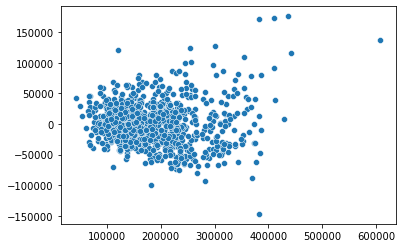

In [46]:
# Homoskedasticity check
sns.scatterplot(Model.fittedvalues, Model.resid) # Should not show prominent non-constant variance (heteroskadastic) of errors against fitted values

/Users/sheeba/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

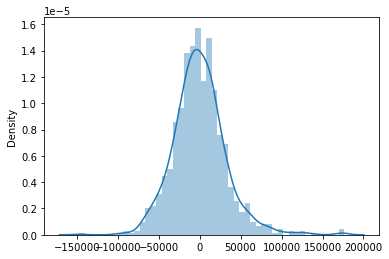

In [47]:
# Normality of errors check
sns.distplot(Model.resid) # Should be somewhat close to normal distribution

In [48]:
# ## In case you would like the plots in different windows, you need to
# ## open a new window first using figure() method from matplotlib library
# ## figure() in python is equivalent to windows() in R
# from matplotlib.pyplot import figure
# figure()
# sns.scatterplot(Model.fittedvalues, Model.resid)
# figure()
# sns.distplot(Model.resid)

### Model Evaluation

In [49]:
# RMSE
import numpy as np
np.sqrt(np.mean((testY - Test_Pred)**2))
# This means on an "average", the house price prediction would have +/- error of about 56140

49760.395413539205

Now, is this a good model? Probably an "Average" model. If I told you your house was going to sell for dollar 300,000 and then it actually only sold for dollar244,000 (Roughly dollar 56,000 error), you would be pretty mad. dollar56,000 is a reasonable difference when you're buying/selling a home. If the prediction is dollar 300,000, then the house would be cold somewhere between dollar 244,000 and dollar 356,000. But what if I told you that I could predict GDP (Gross Domestic Product) of the US with only an average error of dollar56000? Well, since the GDPs are usually around dollar 20 trillion, that difference (of dollar56,000) wouldn't be so big. So, an RMSE of dollar 56,000 would be acceptable in a GDP model but not in Property prediction model like ours! So, there is a bit of relativity involved in RMSE values.

In [50]:
# MAPE (Mean Absolute Percentage Error)
(np.mean(np.abs(((testY - Test_Pred)/testY))))*100
# This means on an "average", the house price prediction would have +/- error of 20%
# Generally, MAPE under 10% is considered very good, and anything under 20% is reasonable.
# MAPE over 20% is usually not considered great.


17.256439908590835